In [74]:
#lSTM Stock prediction

In [260]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None #unblock chains

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [261]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'MSFT', 'TSLA', 'PFE']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [262]:
company_list = [AAPL, MSFT, TSLA, PFE]
company_name = ['AAPL', 'MSFT', 'TSLA','PFE' ]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)
#print(company_list)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-03-26,36.290001,35.639999,35.680000,36.250000,27897100.0,36.250000,PFE
2021-03-29,36.740002,35.900002,36.029999,36.619999,27004800.0,36.619999,PFE
2021-03-30,36.630001,36.020000,36.590000,36.110001,26303300.0,36.110001,PFE
2021-03-31,36.430000,36.040001,36.150002,36.230000,26582700.0,36.230000,PFE
2021-04-01,36.450001,36.020000,36.299999,36.299999,21299700.0,36.299999,PFE
2021-04-05,36.570000,36.099998,36.439999,36.279999,22096900.0,36.279999,PFE
2021-04-06,36.400002,36.000000,36.259998,36.049999,20722900.0,36.049999,PFE
2021-04-07,36.240002,35.759998,36.029999,35.910000,21933800.0,35.910000,PFE
2021-04-08,36.150002,35.869999,35.959999,35.959999,18129400.0,35.959999,PFE


In [263]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,111.851674,108.858765,110.428098,110.413068,1.341341e+08,110.117892
std,20.204511,19.568908,20.053965,19.865399,5.216758e+07,19.991941
min,68.425003,66.357498,67.077499,67.092499,4.669130e+07,66.576424
25%,95.067501,93.363750,94.016251,94.136250,9.685285e+07,93.665024
50%,118.040001,114.919998,116.570000,116.320000,1.210473e+08,116.125824
75%,126.301250,122.639999,124.688751,124.816250,1.578708e+08,124.516293
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.946396


In [264]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-04-13 to 2021-04-09
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          251 non-null    float64
 1   Low           251 non-null    float64
 2   Open          251 non-null    float64
 3   Close         251 non-null    float64
 4   Volume        251 non-null    float64
 5   Adj Close     251 non-null    float64
 6   company_name  251 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.7+ KB


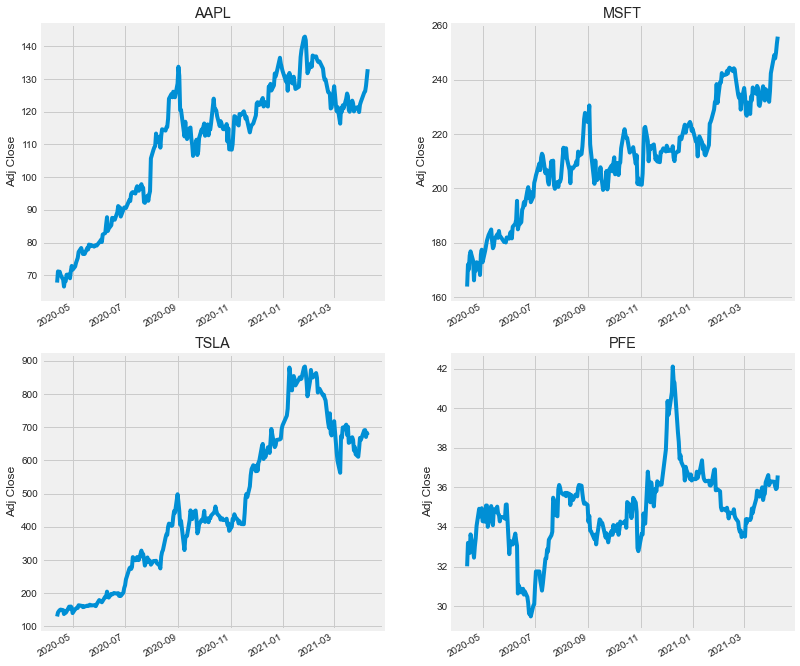

In [265]:
# Let's see a historical view of the closing price


plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

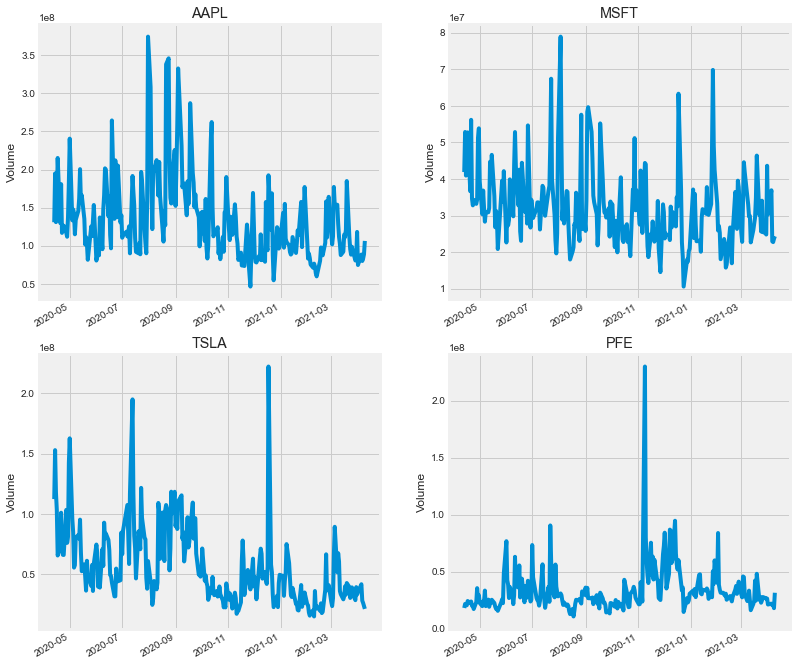

In [266]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

In [267]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
print(AAPL.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


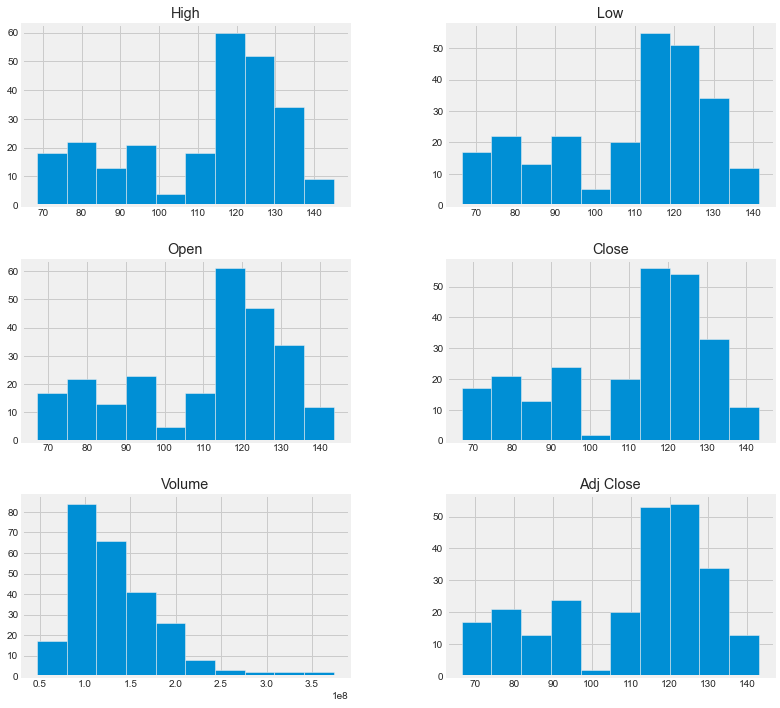

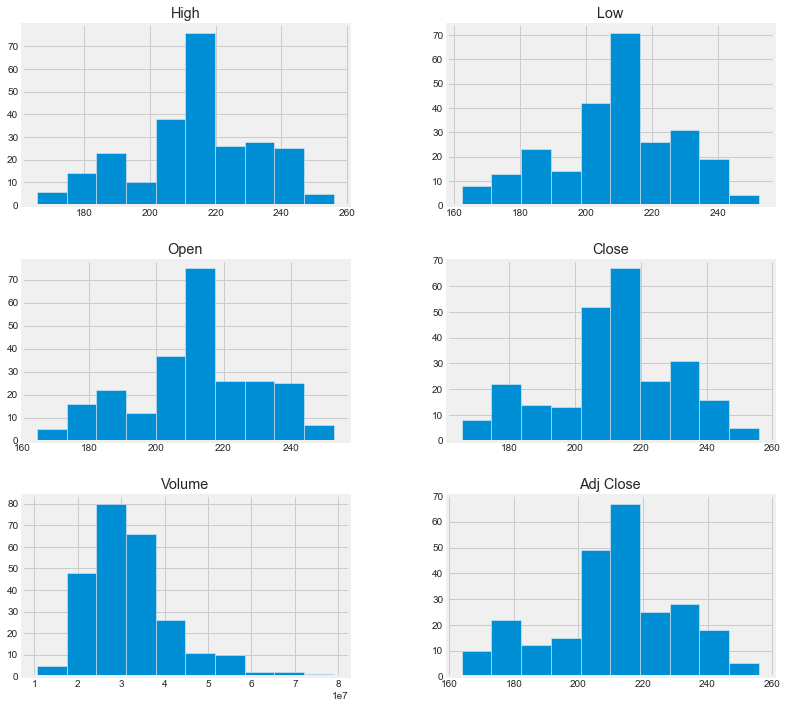

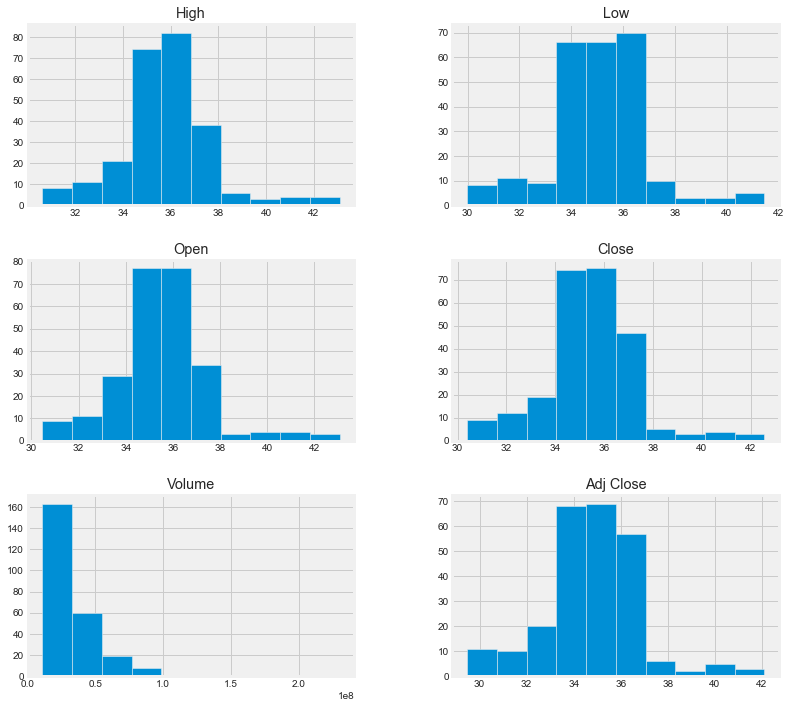

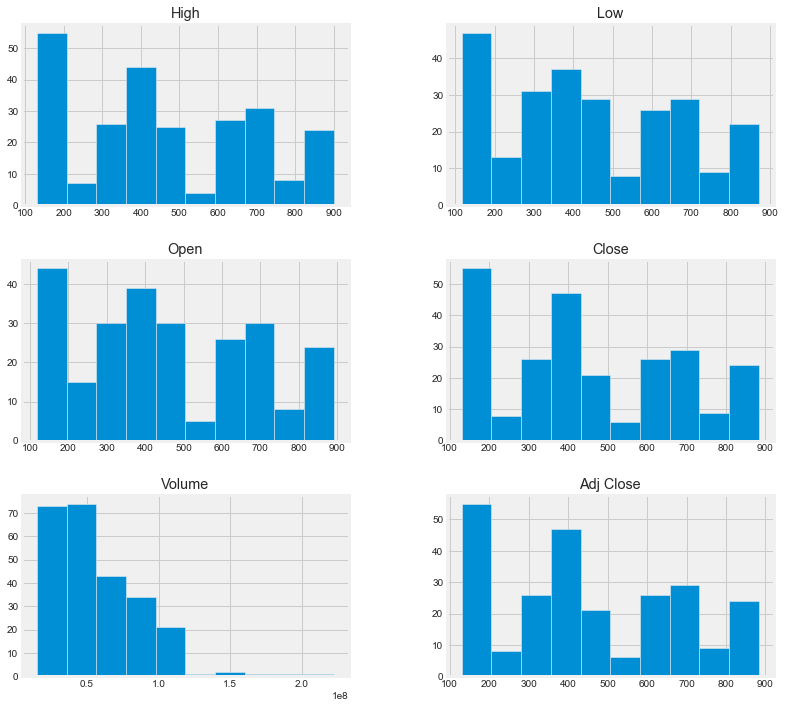

In [268]:
df.groupby("company_name").hist(figsize=(12, 12));

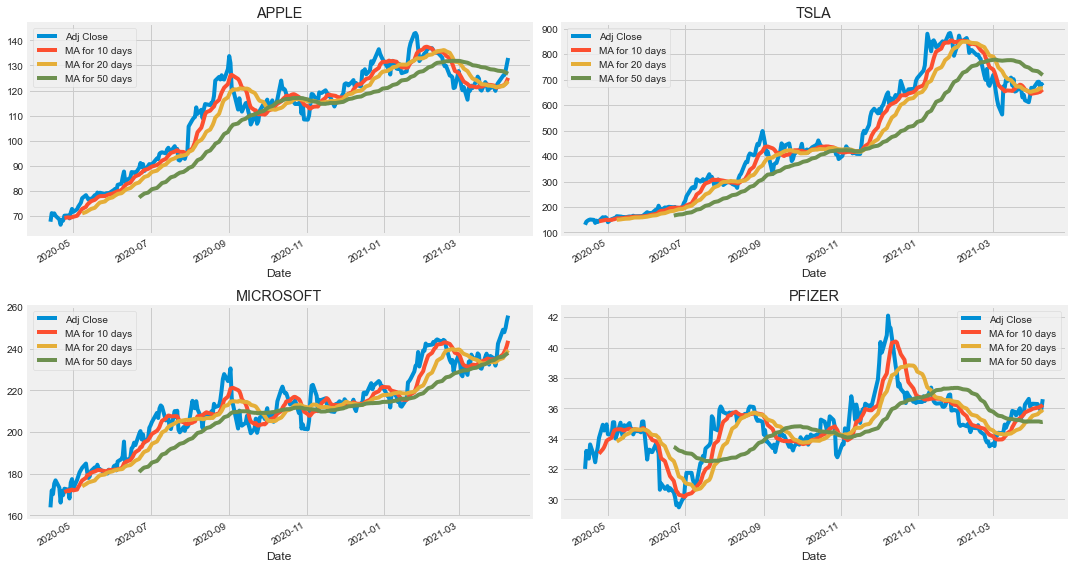

In [269]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('TSLA')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

PFE[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('PFIZER')

fig.tight_layout()

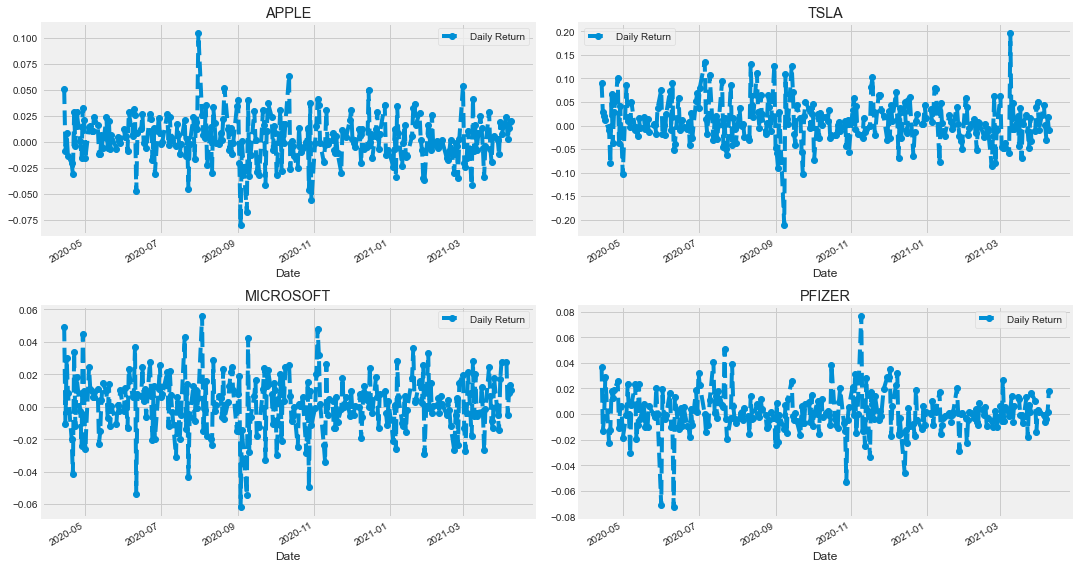

In [270]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

TSLA['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('TSLA')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

PFE['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('PFIZER')

fig.tight_layout()

/Users/pravinraja/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pravinraja/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pravinraja/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

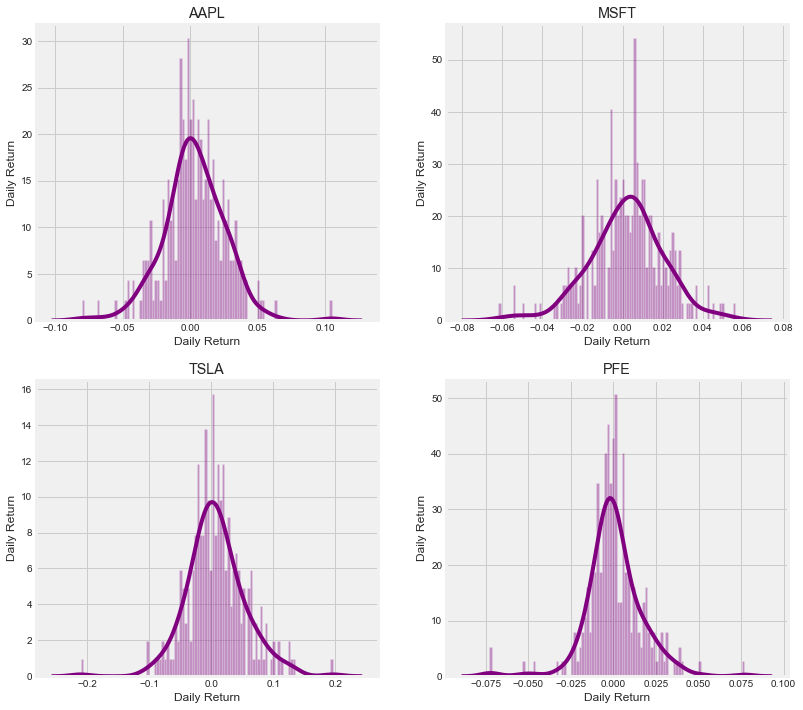

In [271]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()

In [272]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,MSFT,TSLA,PFE
Date,,,,
2020-04-13,67.787041,163.844971,130.190002,32.010159
2020-04-14,71.210495,171.952606,141.977997,33.194370
2020-04-15,70.560539,170.150940,145.966003,32.766232
2020-04-16,71.121201,175.259003,149.042007,32.684246
2020-04-17,70.156174,176.803314,150.778000,33.622505


In [273]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,MSFT,TSLA,PFE
Date,,,,
2020-04-13,NaN,NaN,NaN,NaN
2020-04-14,0.050503,0.049484,0.090545,0.036995
2020-04-15,-0.009127,-0.010478,0.028089,-0.012898
2020-04-16,0.007946,0.030021,0.021073,-0.002502
2020-04-17,-0.013569,0.008812,0.011648,0.028707


/Users/pravinraja/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


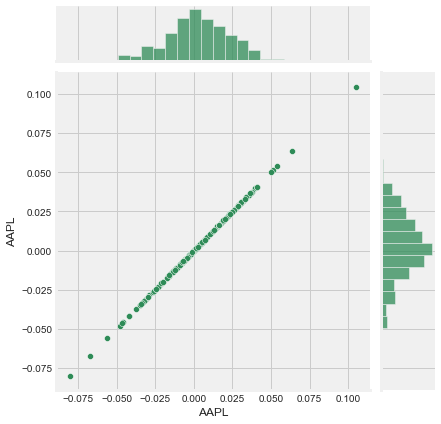

In [276]:
# Comparing Apple to itself should show a perfectly linear relationship
sns.jointplot('AAPL', 'AAPL', tech_rets, kind='scatter', color='seagreen')

/Users/pravinraja/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


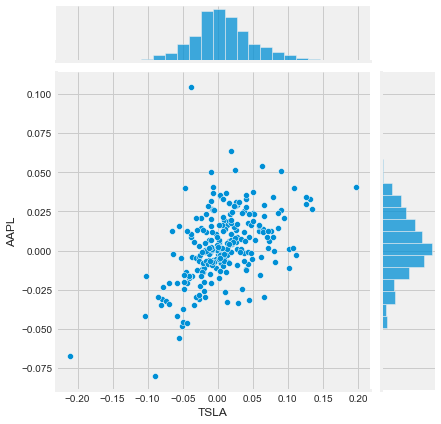

In [277]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('TSLA', 'AAPL', tech_rets, kind='scatter')

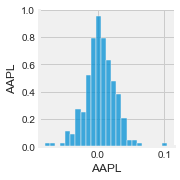

In [54]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

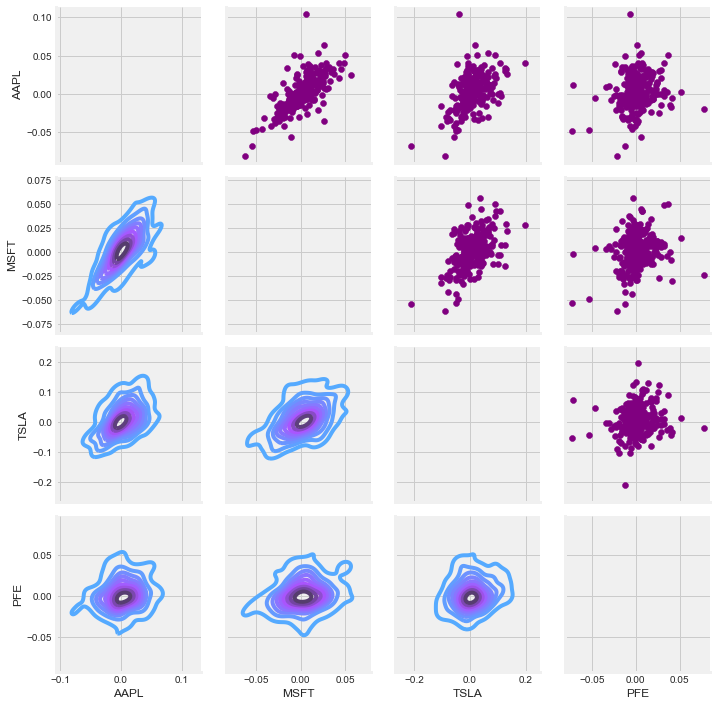

In [278]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

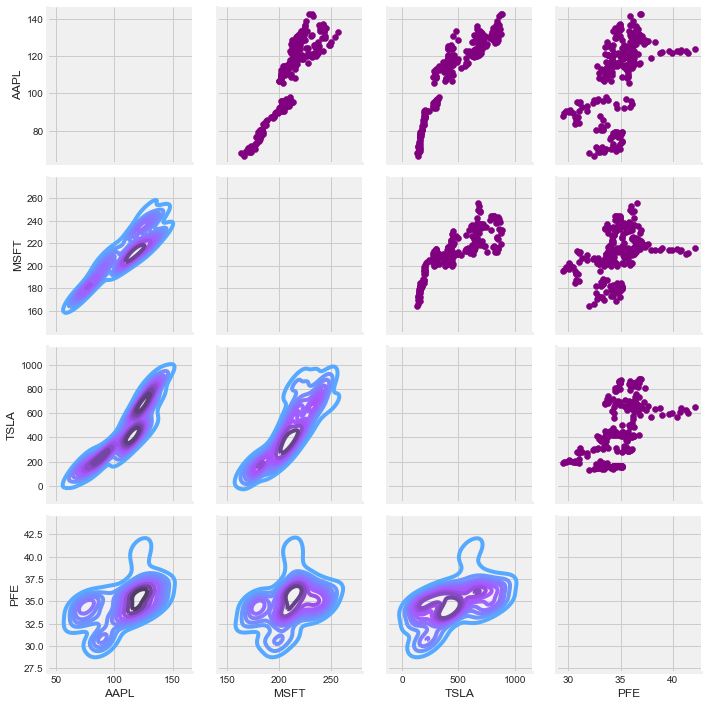

In [105]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

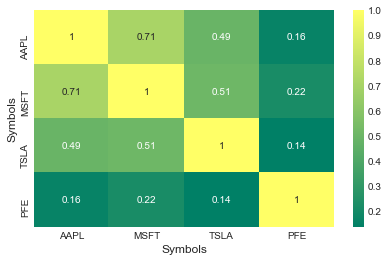

In [279]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

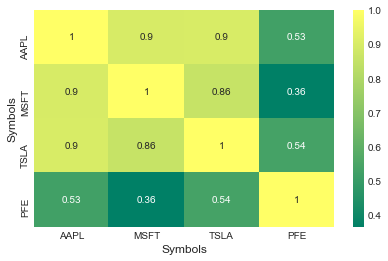

In [280]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

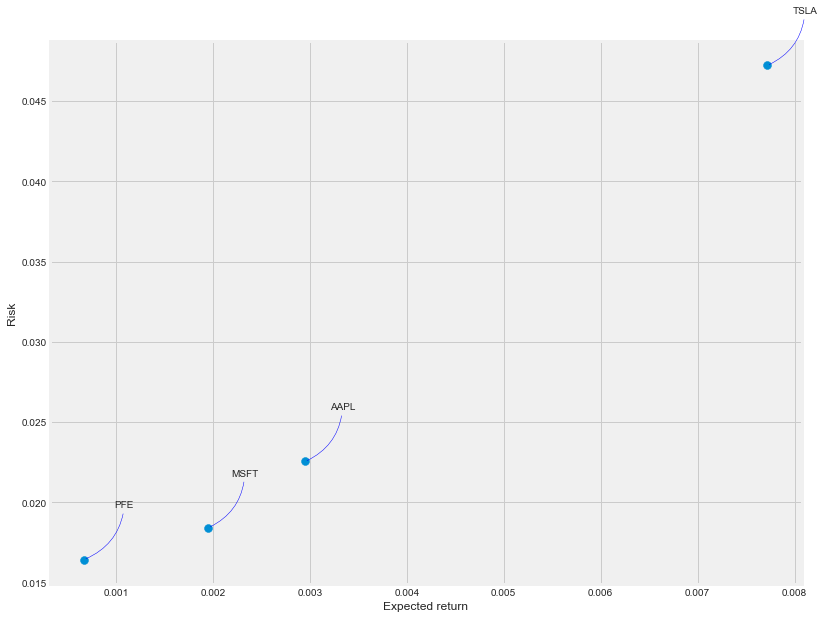

In [281]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [229]:
# Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2011-01-01', end=datetime.now()) # AAPL stock dataframe
df1 = DataReader('MSFT', data_source='yahoo', start='2011-01-01', end=datetime.now()) # MSFT stock dataframe
df2 = DataReader('TSLA', data_source='yahoo', start='2011-01-01', end=datetime.now()) #TSLA stock dataframe
df3 = DataReader('PFE', data_source='yahoo', start='2011-01-01', end=datetime.now()) #PFE Stock dataframe
# Show teh data
df #Show TSLA

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.138556
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.191467
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.274836
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.266529
2011-01-07,12.012500,11.853571,11.928214,12.004286,311931200.0,10.340052
...,...,...,...,...,...,...
2021-04-05,126.160004,123.070000,123.870003,125.900002,88651200.0,125.900002
2021-04-06,127.129997,125.650002,126.500000,126.209999,80171300.0,126.209999
2021-04-07,127.919998,125.139999,125.830002,127.900002,83466700.0,127.900002


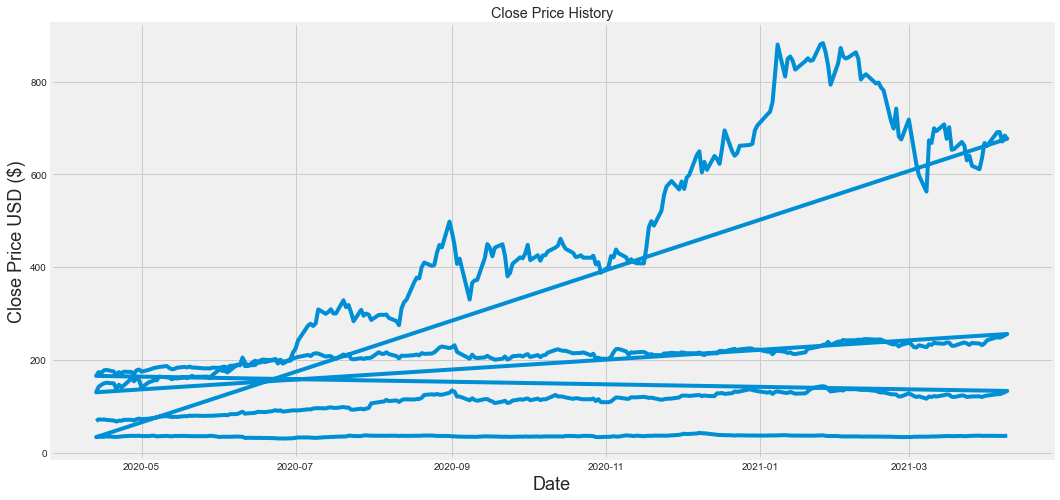

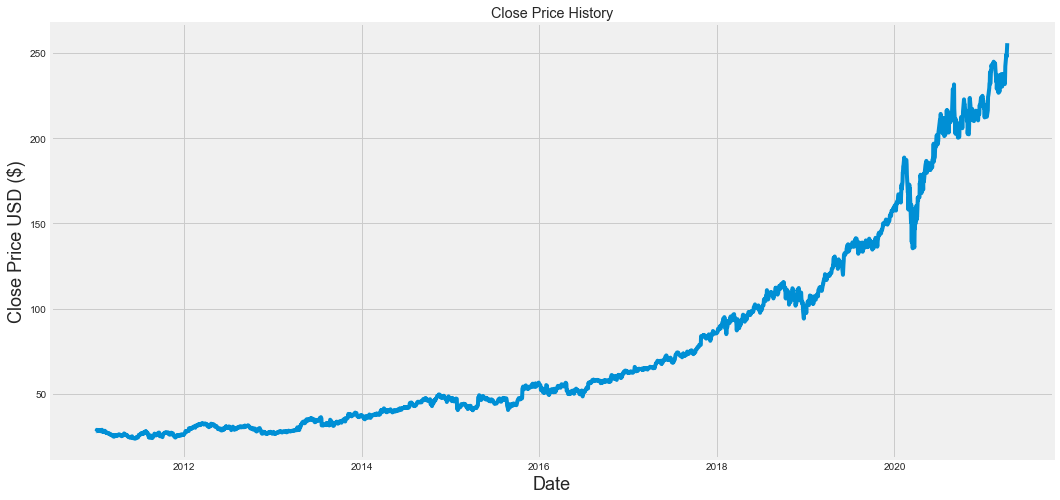

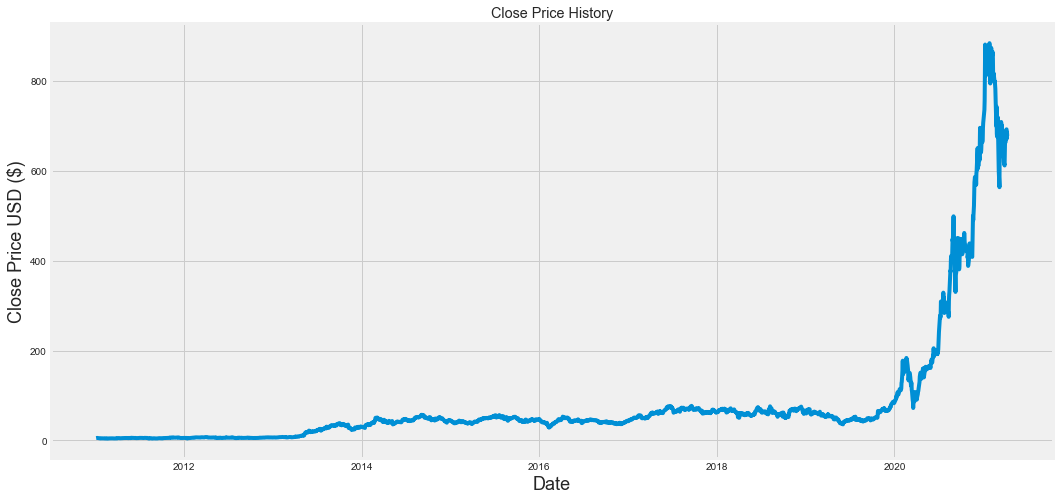

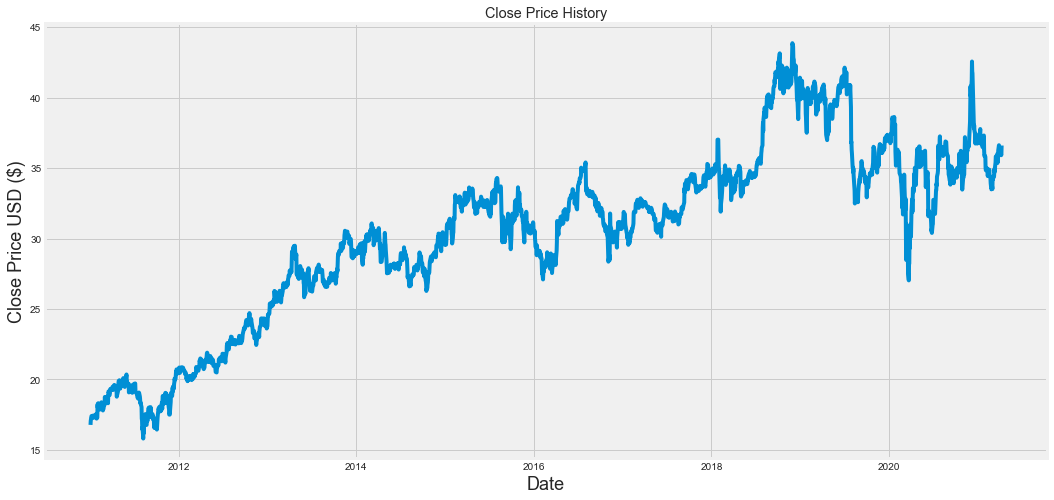

In [282]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df1['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df2['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df3['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [283]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
data1 = df1.filter(['Close'])
data2 = df2.filter(['Close'])
data3 = df3.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
dataset1 = data1.values
dataset2 = data2.values
dataset3 = data3.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len1 = int(np.ceil( len(dataset1) * .95 ))
training_data_len2 = int(np.ceil( len(dataset2) * .95 ))
training_data_len3 = int(np.ceil( len(dataset3) * .95 ))

training_data_len
training_data_len1
training_data_len2
training_data_len3

2455

In [284]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1)) #AAPL
scaled_data = scaler.fit_transform(dataset)

scaler1 = MinMaxScaler(feature_range=(0,2)) #MSFT
scaled_data1 = scaler.fit_transform(dataset1)

scaler2 = MinMaxScaler(feature_range=(0,3)) #TSLA
scaled_data2 = scaler.fit_transform(dataset2)

scaler3 = MinMaxScaler(feature_range=(0,4)) #PFE
scaled_data3 = scaler.fit_transform(dataset3)

scaled_data
scaled_data1
scaled_data2
scaled_data3


array([[0.03449445],
       [0.04497803],
       [0.04903618],
       ...,
       [0.71657556],
       [0.71835774],
       [0.74117003]])

In [285]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :] #AAPL
train_data1 = scaled_data1[0:int(training_data_len1), :] #MSFT
train_data2 = scaled_data2[0:int(training_data_len2), :] #TSLA
train_data3 = scaled_data3[0:int(training_data_len3), :] #PFE
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

x_train1 = []
y_train1 = []

x_train2 = []
y_train2 = []

x_train3 = []
y_train3 = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

for i in range(60, len(train_data1)):
    x_train1.append(train_data1[i-60:i, 0])
    y_train1.append(train_data1[i, 0])
    if i<= 61:
        print(x_train1)
        print(y_train1)
        print()

for i in range(60, len(train_data2)):
    x_train2.append(train_data2[i-60:i, 0])
    y_train2.append(train_data2[i, 0])
    if i<= 61:
        print(x_train2)
        print(y_train2)
        print()

for i in range(60, len(train_data3)):
    x_train3.append(train_data3[i-60:i, 0])
    y_train3.append(train_data3[i, 0])
    if i<= 61:
        print(x_train3)
        print(y_train3)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
x_train1, y_train1 = np.array(x_train1), np.array(y_train1)
x_train2, y_train2 = np.array(x_train2), np.array(y_train2)
x_train3, y_train3 = np.array(x_train3), np.array(y_train3)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train1 = np.reshape(x_train1, (x_train1.shape[0], x_train1.shape[1], 1))
x_train2 = np.reshape(x_train2, (x_train2.shape[0], x_train2.shape[1], 1))
x_train3 = np.reshape(x_train3, (x_train3.shape[0], x_train3.shape[1], 1))
# x_train.shape

[array([0.04446393, 0.04850994, 0.04774179, 0.0484044 , 0.04726389,
       0.04554287, 0.04303317, 0.04529952, 0.04498581, 0.04731373,
       0.04737237, 0.04602663, 0.04870932, 0.05048897, 0.04910219,
       0.05030133, 0.05159136, 0.05249145, 0.05340327, 0.05527675,
       0.05670752, 0.05565203, 0.05454964, 0.05510377, 0.05456723,
       0.05669285, 0.05615926, 0.05794478, 0.05724699, 0.05784509,
       0.0572118 , 0.0576164 , 0.05765745, 0.05756656, 0.05871293,
       0.05914978, 0.05967166, 0.05885073, 0.06154221, 0.06211685,
       0.06520414, 0.06779886, 0.06283224, 0.06368248, 0.06491095,
       0.06757604, 0.06743238, 0.06747343, 0.06688411, 0.06956679,
       0.07181263, 0.06991569, 0.07131713, 0.06803049, 0.07041998,
       0.0713054 , 0.0711031 , 0.0711031 , 0.07395877, 0.07361867])]
[0.07616355263992743]

[array([0.04446393, 0.04850994, 0.04774179, 0.0484044 , 0.04726389,
       0.04554287, 0.04303317, 0.04529952, 0.04498581, 0.04731373,
       0.04737237, 0.04602663, 0.04

In [286]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model1 = Sequential()
model1.add(LSTM(128, return_sequences=True, input_shape= (x_train1.shape[1], 1)))
model1.add(LSTM(64, return_sequences=False))
model1.add(Dense(25))
model1.add(Dense(1))

model2 = Sequential()
model2.add(LSTM(128, return_sequences=True, input_shape= (x_train2.shape[1], 1)))
model2.add(LSTM(64, return_sequences=False))
model2.add(Dense(25))
model2.add(Dense(1))

model3 = Sequential()
model3.add(LSTM(128, return_sequences=True, input_shape= (x_train3.shape[1], 1)))
model3.add(LSTM(64, return_sequences=False))
model3.add(Dense(25))
model3.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model1.compile(optimizer='adam', loss='mean_squared_error')
model2.compile(optimizer='adam', loss='mean_squared_error')
model3.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)
model1.fit(x_train1, y_train1, batch_size=1, epochs=1)
model2.fit(x_train2, y_train2, batch_size=1, epochs=1)
model3.fit(x_train3, y_train3, batch_size=1, epochs=1)

2395/2395 [==============================] - 43s 17ms/step - loss: 0.0069


In [288]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
test_data1 = scaled_data1[training_data_len1 - 60: , :]
test_data2 = scaled_data2[training_data_len2 - 60: , :]
test_data3 = scaled_data3[training_data_len3 - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test1 = []
y_test1 = dataset1[training_data_len1:, :]
for i in range(60, len(test_data1)):
    x_test1.append(test_data1[i-60:i, 0])

x_test2 = []
y_test2 = dataset2[training_data_len2:, :]
for i in range(60, len(test_data2)):
    x_test2.append(test_data2[i-60:i, 0])

x_test3 = []
y_test3 = dataset3[training_data_len3:, :]
for i in range(60, len(test_data3)):
    x_test3.append(test_data3[i-60:i, 0])
# Convert the data to a numpy array
x_test = np.array(x_test)
x_test1 = np.array(x_test1)
x_test2 = np.array(x_test2)
x_test3 = np.array(x_test3)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
x_test1 = np.reshape(x_test1, (x_test1.shape[0], x_test1.shape[1], 1 ))
x_test2 = np.reshape(x_test2, (x_test2.shape[0], x_test2.shape[1], 1 ))
x_test3 = np.reshape(x_test3, (x_test3.shape[0], x_test3.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

predictions1 = model1.predict(x_test1)
predictions1 = scaler.inverse_transform(predictions1)

predictions2 = model2.predict(x_test2)
predictions2 = scaler.inverse_transform(predictions2)

predictions3 = model3.predict(x_test3)
predictions3 = scaler.inverse_transform(predictions3)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

rmse1 = np.sqrt(np.mean(((predictions1 - y_test1) ** 2)))
rmse1

rmse2 = np.sqrt(np.mean(((predictions2 - y_test2) ** 2)))
rmse2

rmse3 = np.sqrt(np.mean(((predictions3 - y_test3) ** 2)))
rmse3

0.9607729088316528

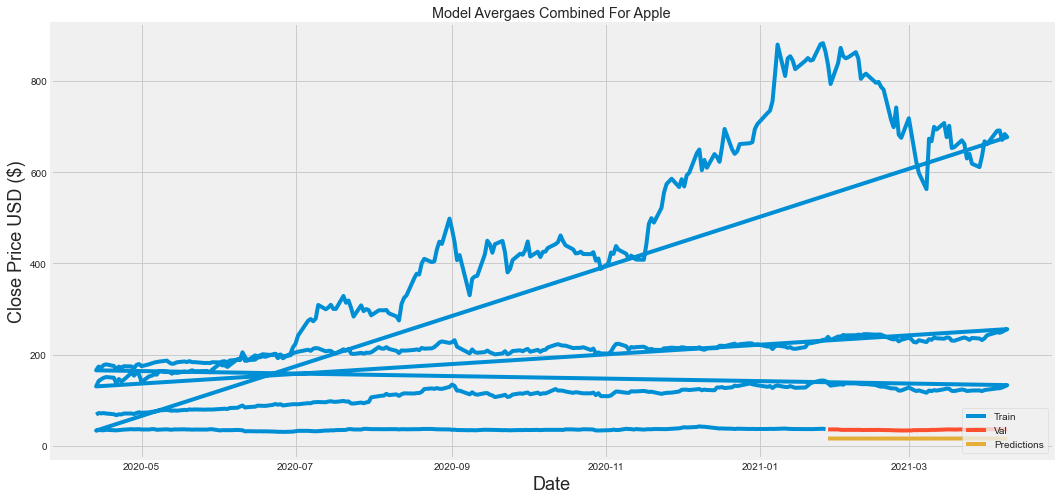

In [309]:
import os
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model Avergaes Combined For Apple')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
strFile = "/usr/local/var/www/AppleLSTM.png"
if os.path.isfile(strFile):
   os.remove(strFile)   # Opt.: os.system("rm "+strFile)
plt.savefig(strFile)
plt.show()
# Show the valid and predicted prices
#valid # Prediction for AAPL
#import pandas as pd
#import matplotlib.pylab as plt
#from pandas.plotting import table
#valid #Prediction for AAPL
# set fig size
#fig, ax = plt.subplots(figsize=(12, 3)) 
# no axes
#ax.xaxis.set_visible(False)  
#ax.yaxis.set_visible(False)  
# no frame
#ax.set_frame_on(False)  
# plot table
#tab = table(ax, valid, loc='upper right')  
# set font manually
#tab.auto_set_font_size(False)
#tab.set_fontsize(8) 
# save the result
#plt.savefig('/usr/local/var/www/AAPL-LSTM.png')

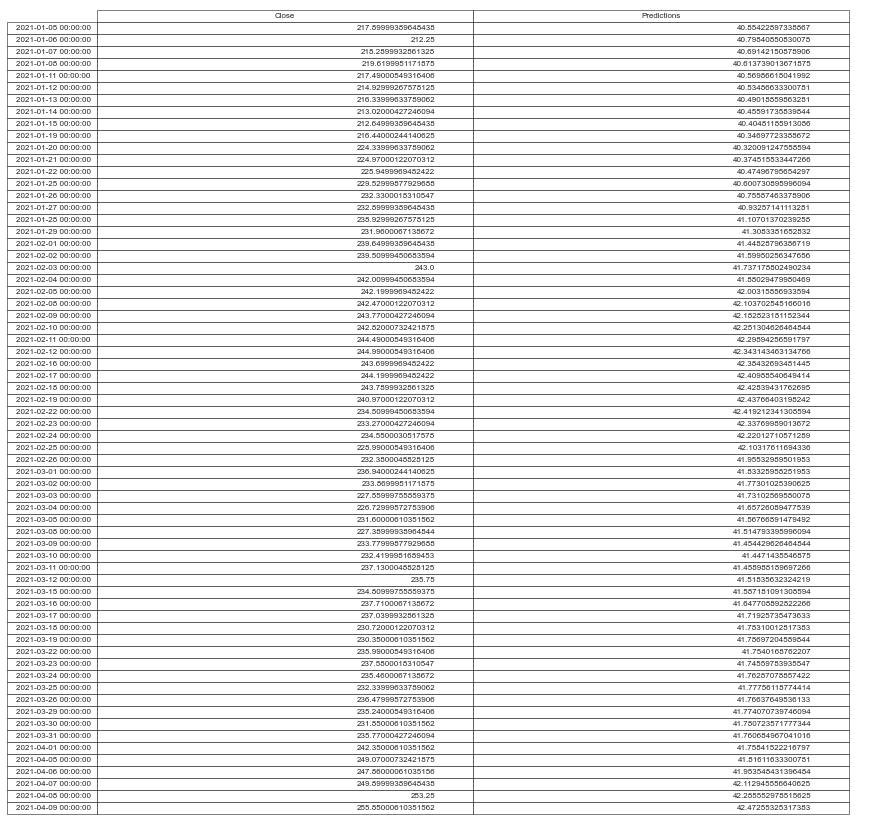

In [252]:
import pandas as pd
import matplotlib.pylab as plt
from pandas.plotting import table
valid1 #Prediction for MSFT
# set fig size
fig, ax = plt.subplots(figsize=(12, 3)) 
# no axes
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
# no frame
ax.set_frame_on(False)  
# plot table
tab = table(ax, valid1, loc='upper right')  
# set font manually
tab.auto_set_font_size(False)
tab.set_fontsize(8) 
# save the result
#plt.savefig('/usr/local/var/www/MSFT-LSTM.png')

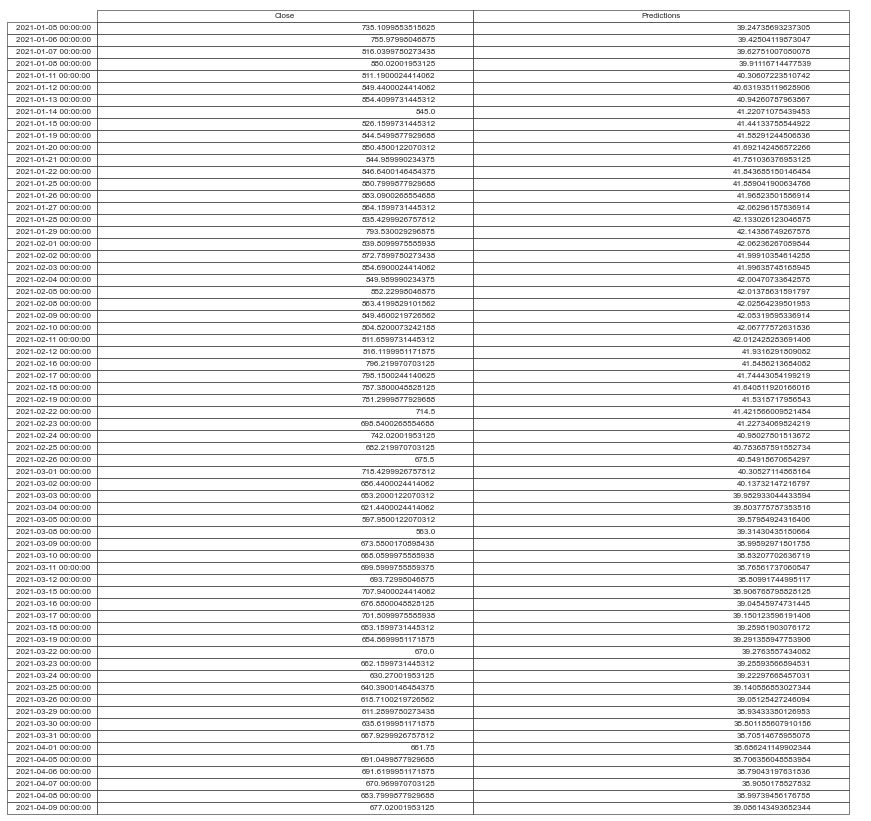

In [251]:
import pandas as pd
import matplotlib.pylab as plt
from pandas.plotting import table
valid2 #Prediction for TSLA
# set fig size
fig, ax = plt.subplots(figsize=(12, 3)) 
# no axes
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
# no frame
ax.set_frame_on(False)  
# plot table
tab = table(ax, valid2, loc='upper right')  
# set font manually
tab.auto_set_font_size(False)
tab.set_fontsize(8) 
# save the result
#plt.savefig('/usr/local/var/www/TSLA-LSTM.png')

In [2]:
import pandas as pd
import matplotlib.pylab as plt
from pandas.plotting import table
valid3 # Prediction for PFE
# set fig size
fig, ax = plt.subplots(figsize=(12, 3)) 
# no axes
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
# no frame
ax.set_frame_on(False)  
# plot table
tab = table(ax, valid3, loc='upper right')  
# set font manually
tab.auto_set_font_size(False)
tab.set_fontsize(8) 
# save the result
#plt.savefig('/usr/local/var/www/PFE-LSTM.png')

NameError: name 'valid3' is not defined

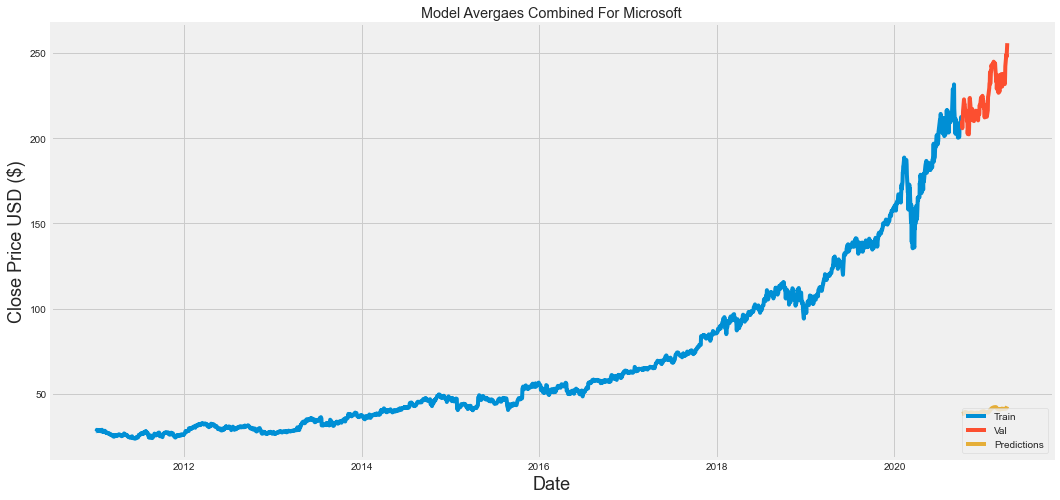

In [299]:
train1 = data1[:training_data_len1]
valid1 = data1[training_data_len1:]
valid1['Predictions'] = predictions1
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model Avergaes Combined For Microsoft')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train1['Close'])
plt.plot(valid1[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
strFile = "/usr/local/var/www/MSFTLSTM-Plot.png"
if os.path.isfile(strFile):
   os.remove(strFile)   # Opt.: os.system("rm "+strFile)
plt.savefig(strFile)
plt.show()

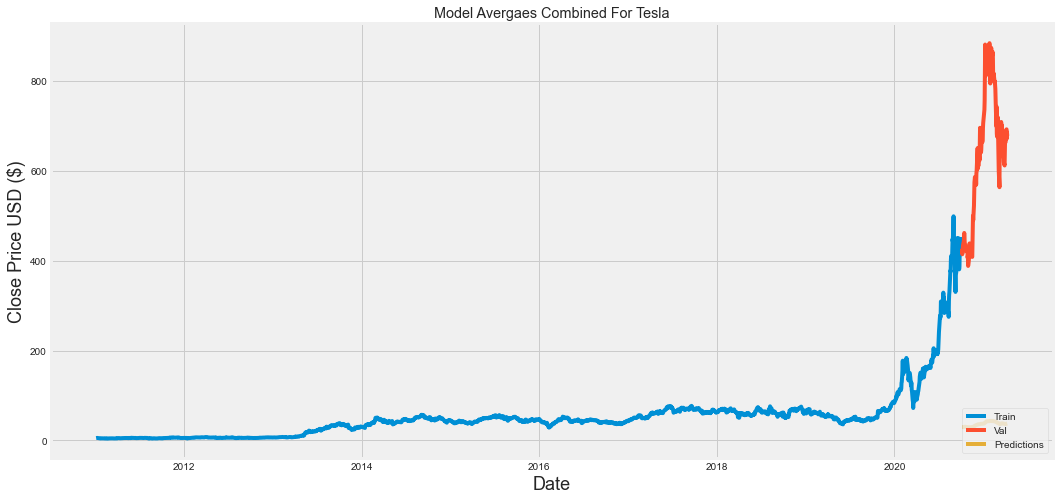

In [300]:
train2 = data2[:training_data_len2]
valid2 = data2[training_data_len2:]
valid2['Predictions'] = predictions2
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model Avergaes Combined For Tesla')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train2['Close'])
plt.plot(valid2[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
strFile = "/usr/local/var/www/TESLALSTM-Plot.png"
if os.path.isfile(strFile):
   os.remove(strFile)   # Opt.: os.system("rm "+strFile)
plt.savefig(strFile)
plt.show()

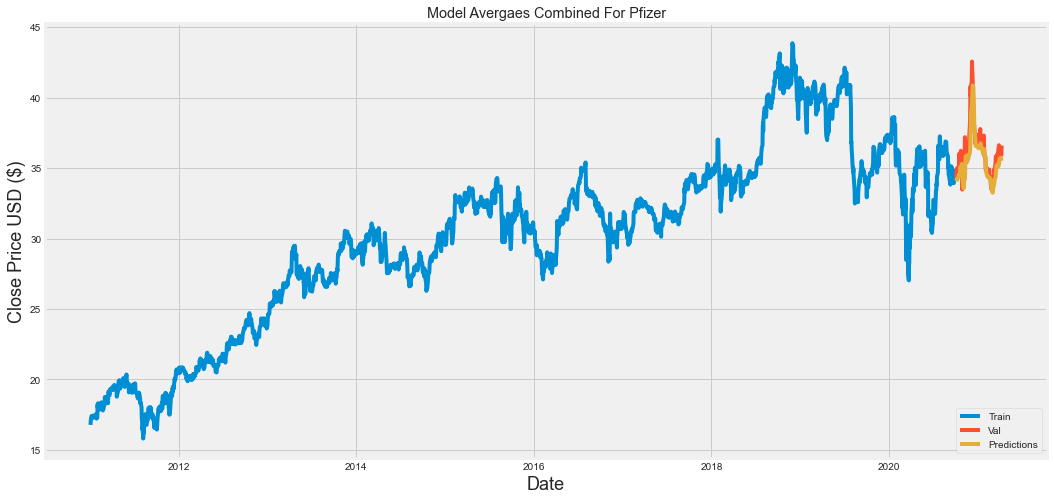

In [301]:
train3 = data3[:training_data_len3]
valid3 = data3[training_data_len3:]
valid3['Predictions'] = predictions3
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model Avergaes Combined For Pfizer')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train3['Close'])
plt.plot(valid3[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
strFile = "/usr/local/var/www/PfizerLSTM-Plot.png"
if os.path.isfile(strFile):
   os.remove(strFile)   # Opt.: os.system("rm "+strFile)
plt.savefig(strFile)
plt.show()